# SENTIMENT ANALYSIS on SOCIAL MEDIA using NLP, Classifiation and Clustering 

             ### Author : Ahmad Fairuz Ali
             ### Date : 18 March 2017
             ### Updated : 10 April 2017 
             ### Venue : Telekom Malaysia

### <a id='toc'>Table of Content</a>

1.0 <a href='#env'>Preparing the environment</a>

2.0 <a href='#twitter'>Let's crawl the Twitter</a>

   * 2.1 <a href='#ptt'>Process the tweet</a>

   * 2.2 <a href='#mlicns'>Malay Language is currently not supported</a>

3.0 <a href='#nlp'>Natural Language Processing (NLP)</a>
   
   * 3.1 <a href='#saipanw'> NLP : Sentiment Analysis using corpus from UIC Computer Science Deparment</a>

   * 3.2 <a href='#textblob'> NLP : Using Python TextBlob NLP library</a>

4.0 <a href='#ml'>Machine Learning (ML)</a>

   * 4.1 <a href='#pttds'>Preparing the training and test data sets </a>

   * 4.2 <a href='#rf'>Using Random Forest (RF) as Classifier</a>

   * 4.3 <a href='#naive'>NAIVE BAYES as Classifier</a>

5.0 <a href='#clustering'>Clustering</a>

   * 5.1 <a href='#tfidf'>TF-IDF representation and K-Means clustering</a>

   * 5.2 <a href='#nmf'>Using Non Matrix Factorization (NMF) for clustering</a>

6.0 <a href='#summary'>Summary</a> 

## <a id='questions'>Strategic Business Questions:</a> 

Company always wanted to know what their customer felts about their products. Today, the feedback from customer are not captured through traditional medium (e.g. forms, phone calls, online feedback), but rather most of this feedback can be captured in the social media. One of the famous place to get the customer's feedback is Twitter. 

Therefore, the below questions follows.

1. Does the customer really enjoy our products? 
2. What are the polarity of the sentiments? (NLP & classification)
3. What does the customer's want? (Clustering) 

In this course work, we are using 2 methods in performing sentiment analysis. 

1. Natural language processing (NLP) using sentiment corpus. 
2. Machine learning. 

## <a id='nlp'>Natual Language Processing(NLP) </a> 

1. We are trying to use 2 ways to evaluate the NLP of sentiment. 
2. The <a href='#saipanw'>first method </a>(click here to jump to the section) NLP is by using corpus from http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html which contains the positive and negative opinion corpus. The output will be score of Tweets with sentiment of positive and negative.  
3. The <a href='#textblob'>second method </a> (click here to jump to the section) is by using Python NLP library called TextBlob. 

## <a id='ml'>Machine Learning(ML) </a>

1. In ML, we are trying to achieve 2 things, clustering and classification. 

## <a id='classification'>Classification</a>

1. Classification is a basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral. (https://en.wikipedia.org/wiki/Sentiment_analysis). 
2. In this exercise, we are testing using <a href="#naive">Naive Bayes </a>(click here to jump to the section) and <a href="#rf">Random Forest(RF)</a> (click here to jump to the section) as the classification ML. 
3. There are other ML e.g. SVM or Maximum Entropy, which we will try later. 
4. The ourput will be sentiment polarity in positive, negative or neutral. 
5. Another output is to predict the sentiment given a single tweet. 

## <a id='clustering'>Clustering</a>

1. Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).(https://en.wikipedia.org/wiki/Cluster_analysis) 
2. In this exercise, we are testing using <a href='#tfidf'>K-Means</a> and <a href='#nmf'>NMF</a> to cluster/group the tweet data. 
3. The output will be group of high frequency words found in the tweets. 

## <a id='challenges'>Challenges</a>

1. Our keywords are focusing on products belong to Telekom Malaysia. Hence, below are the keywords used to crawl from Twitter.

| No| Keywords             |
| --| -------------------- |
| 1 | Streamyx             |
| 2 | Telekom Malaysia     |
| 3 | webe                 |
      
2. Some of the tweets were written in Bahasa Melayu. In NLTK reference, there is no sentiment corpus for Bahasa Melayu. Hence, what we did is to translate these tweets from Bahasa Melayu to English. 
3. We are also having problem to measure the accuracy of each ML. 

## Next Challenges

1. In the ML practive below, we have yet to perform cross validation onto our training data set. We still manually label the training data set. We hope that we can somehow find ways to label the training data set a lot more. 
2. We also plan to store this data inside Hadoop and graphically protrayed the sentiments on time basis.  
3. We also plan to process emoticon. :) :( 
4. We plan to scrap sentiments from the following social media.

| No | Social Media |
| -- |--------------|
| 1. | Facebook     |
| 2. | Instagram    |
| 3. | Forum        |
| 4. | Blogs        |





AHMAD FAIRUZ ALI,
0162081485 ,
TELEKOM MALAYSIA,  
25 March 2017. 


## 1.0 <a id='env'>Preparing the environment</a>
<a href="#toc">Home</a>

In [1]:
import pandas as pd
import os
import json
from pprint import pprint

In [2]:
pd.set_option('display.height', 10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 10000)
pd.set_option('display.max_columns', None)

height has been deprecated.



In [3]:
cd /home/ahmad/Documents/project/twitter/

/home/ahmad/Documents/project/twitter


## 2.0 <a id='twitter'>Let's run some python script to crawl the Tweet</a>
<a href="#toc">Home</a>

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
import time
import io

# author :  ahmad fairuz ali
# date : 13 March 2016 

# https://dev.twitter.com/rest/public/rate-limits

# access dari ahmadfairuzali@gmail.com
#
consumer_key = 'Nyw6AzJtkV8xdnqvUMPGlZPLd'
consumer_secret = 'AOnCaeurR4ToXuPe54TN7T23G2F6ZphTQY55wrHl0hb46CvyNI'
access_token = '841476948639473664-ocIszuIYq6UOMryKR892ebkP8aQmxvx'
access_secret = 'NxqDuu9czkMzpY8ktwp78oWtSUtP0g9XxpNdSKvdnPSPL'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

timestr = time.strftime("%Y%m%d-%H%M%S")

import io
try:
    to_unicode = unicode
except NameError:
    to_unicode = str

In [5]:
# this is the function to process the tweet which will store in folder called eds_folder
def process_or_store(tweet,id_name):
    #print(json.dumps(tweet))
    # for each tweet, I created 1 file with filename having query string, tweet ID and timestamp
    # 
    with io.open('eds_folder/' + query + '_' + id_name + '_' + str(timestr) + '.json', 'a',encoding='utf-8') as f:
        str_ = json.dumps(tweet,indent=4, sort_keys=True,separators=(',', ':'), ensure_ascii=False)
        f.write(to_unicode(str_))
    return True

In [6]:
# run the for loop for each query below 
query = "STREAMYX"
#query = "TELEKOM MALAYSIA"
# query = "webe" 

max_list=100000

for status in tweepy.Cursor(api.search,q=query,lang="en").items(max_list):
    id_name = str(status.id)
    process_or_store(status._json,id_name)

In [7]:
# count the number of JSON files collected
!cd  eds_folder/
!ls | wc -l

46


## 2.1 <a id='ptt'>Process the TWEET data</a>
<a href="#toc">Home</a>

In [8]:
# let's get the filename first 
path_to_json = 'eds_folder/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) # print the file name sahaja!

['STREAMYX_842803016042344448_20170325-020228.json', 'STREAMYX_850366420118523906_20170410-224916.json', 'STREAMYX_843673622283665408_20170325-020228.json', 'STREAMYX_849686065187180544_20170410-224916.json', 'STREAMYX_849806515720605696_20170410-224916.json', 'STREAMYX_844719243325169664_20170325-020228.json', 'STREAMYX_843477210333941766_20170325-020228.json', 'STREAMYX_849561112836231171_20170410-224916.json', 'STREAMYX_844579790732460033_20170325-020228.json', 'TELEKOM MALAYSIA_844249056847122432_20170328-010744.json', 'STREAMYX_850670828433928192_20170410-224916.json', 'STREAMYX_847978885048262656_20170410-224916.json', 'STREAMYX_851267040832667648_20170410-224916.json', 'STREAMYX_847827094004527106_20170410-224916.json', 'STREAMYX_849843596228349954_20170410-224916.json', 'STREAMYX_842947574155825152_20170325-020228.json', 'STREAMYX_842730012310564865_20170325-020228.json', 'TELEKOM MALAYSIA_844136098141892608_20170328-010744.json', 'TELEKOM MALAYSIA_844958855050211328_20170328-0

In [11]:
# test opening one file 
with open('eds_folder/STREAMYX_843807333079691264_20170325-020228.json') as data_file:    
    data = json.load(data_file)
print(data['text'])

Streamyx before was better than this TM WiFi tbh


In [12]:
# this will read all the JSON file above and put them into 1 pandas object.
for js in json_files:
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
# Done!

In [13]:
# what are the size?
len(json_text)

24

In [14]:
# let's see what is JSON looks like
json_text

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Apr 05 10:30:10 +0000 2017',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 124659307,
    'id_str': '124659307',
    'indices': [0, 10],
    'name': 'Anas',
    'screen_name': 'AnasJalen'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 849569847335899136,
 'id_str': '849569847335899136',
 'in_reply_to_screen_name': 'AnasJalen',
 'in_reply_to_status_id': 849554330395004928,
 'in_reply_to_status_id_str': '849554330395004928',
 'in_reply_to_user_id': 124659307,
 'in_reply_to_user_id_str': '124659307',
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a>',
 'text': '@AnasJalen What seems to be the issue with your Streamyx ya? Can you elaborate more on your issue please?',
 'trun

In [15]:
# Next is to prepare the jsons_data with 4 columns 
# if hang re-execute again, it will flushs the old value 
jsons_data = pd.DataFrame(columns=['t_id','created_at','text','user_name','location'])

In [16]:
# For this,we scrap the specific json value from the json object to be paste into pandas data frame called 'jsons_data' 
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        t_id = json_text['id']
        created_at = json_text['created_at']
        text = json_text['text']
        user_name = json_text['user']['name']
        location = json_text['user']['location']
        jsons_data.loc[index] = [t_id,created_at,text,user_name,location]

In [17]:
# what is the shape?
jsons_data.shape

(286, 5)

In [18]:
# let's view few of them
jsons_data.head()

,t_id,created_at,text,user_name,location
0,8.428030e+17,Fri Mar 17 18:21:12 +0000 2017,@TMConnects refresh my connection-streamyx,Lil Ariana CupcakKe,Malaysia
1,8.503664e+17,Fri Apr 07 15:15:28 +0000 2017,OMFG STREAMYX,ㅤㅤㅤＤＡＮＩＥＬ Ａ．ㅤㅤㅤㅤㅤ,kat hati awaaa
2,8.436736e+17,Mon Mar 20 04:00:40 +0000 2017,@badrulhisyam92 @TMConnects lol 2 seconds afte...,Adilah Rahman 🐼,penang. sepang. puncak alam
3,8.496861e+17,Wed Apr 05 18:11:59 +0000 2017,RT @maya_karin: UniFi and Streamyx customers? ...,RICHARDJOHNBACCELLIA,"Sacramento, CA"
4,8.498065e+17,Thu Apr 06 02:10:36 +0000 2017,"@swankyhobos Hi. Just to confirm, you're subsc...",TMConnects,"Kuala Lumpur, Malaysia"


## 2.2 <a id='mlicns'>Malay Language is currently not supported. Hence we need to translate these tweet messages from Malay Language to English</a>
<a href="#toc">Home</a>

We found that some of the tweets were in Bahasa Melayu (Malay Language). There is no Malay corpus available freely. Hence, we need to translate them into English. However, we are aware that the sentiment using translation is not accurate. For example, the word 'babi' in Malay language are referring to hate (negative) , but in English could be a good thing (positive) because it's a food.

In [19]:
# taken from https://github.com/mouuff/mtranslate/blob/master/mtranslate/core.py 
import sys
import re

if (sys.version_info[0] < 3):
    import urllib2
    import urllib
    import HTMLParser
else:
    import html.parser
    import urllib.request
    import urllib.parse

agent = {'User-Agent':
"Mozilla/4.0 (\
compatible;\
MSIE 6.0;\
Windows NT 5.1;\
SV1;\
.NET CLR 1.1.4322;\
.NET CLR 2.0.50727;\
.NET CLR 3.0.04506.30\
)"}


def unescape(text):
    if (sys.version_info[0] < 3):
        parser = HTMLParser.HTMLParser()
    else:
        parser = html.parser.HTMLParser()
    return (parser.unescape(text))


def translate(to_translate, to_language="auto", from_language="auto"):
    base_link = "http://translate.google.com/m?hl=%s&sl=%s&q=%s"
    if (sys.version_info[0] < 3):
        to_translate = urllib.quote_plus(to_translate)
        link = base_link % (to_language, from_language, to_translate)
        request = urllib2.Request(link, headers=agent)
        raw_data = urllib2.urlopen(request).read()
    else:
        to_translate = urllib.parse.quote(to_translate)
        link = base_link % (to_language, from_language, to_translate)
        request = urllib.request.Request(link, headers=agent)
        raw_data = urllib.request.urlopen(request).read()
    data = raw_data.decode("utf-8")
    expr = r'class="t0">(.*?)<'
    re_result = re.findall(expr, data)
    if (len(re_result) == 0):
        result = ""
    else:
        result = unescape(re_result[0])
    return (result)

In [20]:
# test out the function translate()
translate('selamat pagi')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.


'good morning'

In [21]:
# here, we are creating a new column with all the translation from the column 'text'. If originally jsons_data['text'] 
# are in English, then it will translate by default with english 
jsons_data['translated'] = ""
for i in range(0,len(jsons_data)):
    temp = jsons_data['text'][i]
    jsons_data['translated'][i] = translate(temp)

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
# let's view some of them 
jsons_data.head(2)

,t_id,created_at,text,user_name,location,translated
0,8.428030e+17,Fri Mar 17 18:21:12 +0000 2017,@TMConnects refresh my connection-streamyx,Lil Ariana CupcakKe,Malaysia,@TMConnects refresh my connection-streamyx
1,8.503664e+17,Fri Apr 07 15:15:28 +0000 2017,OMFG STREAMYX,ㅤㅤㅤＤＡＮＩＥＬ Ａ．ㅤㅤㅤㅤㅤ,kat hati awaaa,OMFG STREAMYX


In [24]:
# save the translated file
jsons_data.to_csv('translated_jsons_data.csv')

## 3.0 <a id='nlp'> Natural Language Processing(NLP) </a>

When using NLP, we have to prepare our environment with Natural Language Tool Kit (NLTK). NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning. This also includes sentiment analysis. 

For Sentiment analysis to identify positive and negative words,we are using University of Illinois of Chicago, Computer Science Department. 

For Sentiment analysis score,we used 

## 3.1 <a id='saipanw'>Sentiment Analysis Based on corpus from UIC Computer Science Dept</a>
<a href="#toc">Home</a>

We will be exploring the NLP method to come out with sentiment analysis. We will be using the sentiment corpus from http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html 


In [25]:
test = pd.read_csv('translated_jsons_data.csv')

In [26]:
test.columns = ['Unnamed: 0', 't_id', 'created_at', 'translated', 'user_name', 'location', 'text']

In [27]:
test.head(2)

,Unnamed: 0,t_id,created_at,translated,user_name,location,text
0,0,8.428030e+17,Fri Mar 17 18:21:12 +0000 2017,@TMConnects refresh my connection-streamyx,Lil Ariana CupcakKe,Malaysia,@TMConnects refresh my connection-streamyx
1,1,8.503664e+17,Fri Apr 07 15:15:28 +0000 2017,OMFG STREAMYX,ㅤㅤㅤＤＡＮＩＥＬ Ａ．ㅤㅤㅤㅤㅤ,kat hati awaaa,OMFG STREAMYX


In [28]:
# NLP Step 1 : Function definition 
def read_wordlist(fname):
    with open(fname) as f:
        wordlist = [line.strip() for line in f.readlines() 
                    if (not line[0]==';') and line.strip()
                   ]
    worddict = dict((word,True) for word in wordlist)
    return worddict

# The file positive-words.txt and negative-words.txt were obtained from 
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html  

positive_words = read_wordlist('positive-words.txt')
negative_words = read_wordlist('negative-words.txt')

def pos_score(row):
    score = 0
    text = str(row['text'])
    for word in text.split():
        if word.lower() in positive_words:
            score += 1           
    return score

def neg_score(row):
    score = 0
    text = str(row['text'])
    for word in text.split():
        if word.lower() in negative_words:
            score += 1           
    return score

# Now let's apply the method to every row in the dataset
test['pos_scores'] = test.apply(pos_score,axis='columns')
test['neg_scores'] = test.apply(neg_score,axis='columns')
test.head()

test.sort('pos_scores', ascending=False).head()
test.sort('neg_scores', ascending=False).head()

#from pandas import DataFrame
#from IPython.display import HTML

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:37: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Unnamed: 0,t_id,created_at,translated,user_name,location,text,pos_scores,neg_scores
285,285,8.495698e+17,Wed Apr 05 10:30:10 +0000 2017,@AnasJalen What seems to be the issue with you...,TMConnects,"Kuala Lumpur, Malaysia",@AnasJalen What seems to be the issue with you...,0,2
8,8,8.445798e+17,Wed Mar 22 16:01:28 +0000 2017,"Streamyx has been shitty lately. Fuck you man,...",takeru,Konohagure,"Streamyx has been shitty lately. Fuck you man,...",0,2
149,149,8.478183e+17,Fri Mar 31 14:30:05 +0000 2017,@TMConnects I have a problem w the Streamyx I ...,F,NaN,@TMConnects I have a problem w the Streamyx I ...,0,2
104,104,8.481877e+17,Sat Apr 01 14:57:53 +0000 2017,Is it just me or the streamyx is awfully slow ...,fitri asyraf zahari,NaN,Is it just me or the streamyx is awfully slow ...,1,2
156,156,8.435363e+17,Sun Mar 19 18:55:10 +0000 2017,Probably I have wasted 20% of my life time by ...,takeru,Konohagure,Probably I have wasted 20% of my life time by ...,0,2


In [29]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
%matplotlib inline

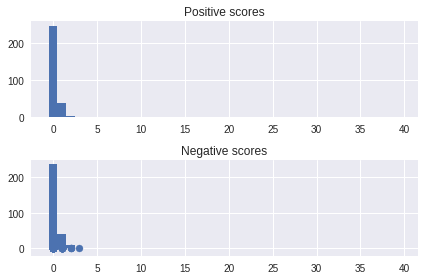

In [30]:
plt.subplot(211)
plt.hist(test['pos_scores'], bins=np.arange(-0.5,40.5))
plt.title("Positive scores")
plt.subplot(212)
plt.hist(test['neg_scores'], bins=np.arange(-0.5,40.5))
plt.title("Negative scores")
plt.tight_layout()
plt.scatter(test['pos_scores'], test['neg_scores']);
forsaving = test[['t_id','created_at','user_name','location','text','pos_scores','neg_scores']]
forsaving.to_csv('result_tweet_using_NLP.csv', sep=',', encoding='utf-8',quotechar='"',line_terminator='\n',header=True)

## Insight 
1. Based on the above graphical, we know that much of the sentiments are neutral (score 0).  

### <a id="textblob">Using Python TextBlob NLP library</a>
<a href="#nlp">(home)</a>

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for 
diving into common natural language processing (NLP) tasks such as part-of-speech tagging, 
noun phrase extraction, sentiment analysis, classification, translation, and more.

In [31]:
from textblob import TextBlob

In [32]:
test.head(2)

,Unnamed: 0,t_id,created_at,translated,user_name,location,text,pos_scores,neg_scores
0,0,8.428030e+17,Fri Mar 17 18:21:12 +0000 2017,@TMConnects refresh my connection-streamyx,Lil Ariana CupcakKe,Malaysia,@TMConnects refresh my connection-streamyx,1,0
1,1,8.503664e+17,Fri Apr 07 15:15:28 +0000 2017,OMFG STREAMYX,ㅤㅤㅤＤＡＮＩＥＬ Ａ．ㅤㅤㅤㅤㅤ,kat hati awaaa,OMFG STREAMYX,0,0


In [33]:
mytextblob = pd.DataFrame(columns=['mytext','tags','phrases','sentiment_polarity'])

In [34]:
i=0
for i in range(0,len(test)):
    mytext = test['translated'][i]
    myblob = TextBlob(test['translated'][i])
    mytags = myblob.tags
    myphrases = myblob.noun_phrases
    mysp = myblob.sentiment.polarity
    mytextblob.loc[i] = [mytext,mytags,myphrases,mysp]
    i=i+1

In [35]:
mytextblob.head(3)

,mytext,tags,phrases,sentiment_polarity
0,@TMConnects refresh my connection-streamyx,"[(@, JJ), (TMConnects, NNP), (refresh, JJ), (m...",[tmconnects],0.0
1,OMFG STREAMYX,"[(OMFG, NNP), (STREAMYX, NNP)]",[omfg streamyx],0.0
2,@badrulhisyam92 @TMConnects lol 2 seconds afte...,"[(@, JJ), (badrulhisyam92, NN), (@, NNP), (TMC...","[@ badrulhisyam92 @, tmconnects, tanya nak upg...",0.8


In [36]:
# save the results
mytextblob.to_csv('mytextblob.csv')

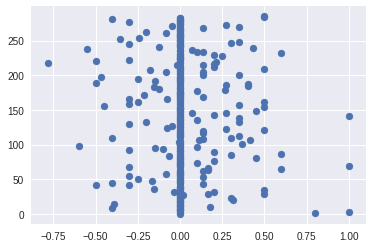

In [37]:
# let's graph them 
#mytextblob['sentiment_polarity']
# mytextblob.index.values.tolist()
plt.scatter(mytextblob['sentiment_polarity'],mytextblob.index.values)

## Insight 
1. Based on the above graphical, we know that much of the sentiments are neutral (score 0.00). 
2. Based on number of dots, there are more dots in the right handside (between 0.00 to 1.00) which refers to positive compared to dots on left handside (between 0.00 to -0.75) which refers to negative sentiment.
3. The results above have similarity with the NLP results from analysis using <a href='#saipanw'>UIC corpus above</a>.

## 4.0 <a id='ml'>MACHINE LEARNING(ML)</a>
<a href="#toc">Home</a>

## 4.1 <a id='pttds'>Preparing the training and test data sets </a>
<a href="#toc">Home</a>

In [38]:
pd.set_option('display.max_columns', None)

### Preparing the train data

In [39]:
# Step 1: Manually edit the file to label the files. Here, I did 20 of them and named the file as 'processed_tweet_labelled.json'  
!head -n 20 translated_jsons_data.csv > translated_jsons_data_labelled.csv

In [40]:
# see if the file created
!ls *.csv

Input495tweets.csv		     result_tweet_clustering.csv
Link to processed_netbase_tweet.csv  result_tweet_using_NLP.csv
mytextblob.csv			     result_tweet_using_RF.csv
output12ktweets.csv		     StreamTM.csv
output12ktweets_translated.csv	     translated_jsons_data.csv
result_rf_predicted.csv		     translated_jsons_data_labelled.csv


In [41]:
# Step 2: open the file using vi and label them manually 
# We have to manually label the new column 'sentiment' of the top 20 of the processed_tweet.json for us to use 
# them as the training set.  
# 
# we label them as below
# '0' -  Neutral
# '1' -  Positive 
# '-1' - Negative
# '9' - Not Applicable 

In [42]:
# Step 3: Load the labelled file
train = pd.read_csv('translated_jsons_data_labelled.csv',header=0,delimiter=",")

In [43]:
# Step 4: Let's view the file , it must have the new column called 'sentiment' which were manually labelled above 
train.head(5)

,no,sentiment,t_id,created_at,text,user_name,location,translated
0,0,1,8.428030e+17,Fri Mar 17 18:21:12 +0000 2017,@TMConnects refresh my connection-streamyx,Lil Ariana CupcakKe,Malaysia,@TMConnects refresh my connection-streamyx
1,1,0,8.436736e+17,Mon Mar 20 04:00:40 +0000 2017,@badrulhisyam92 @TMConnects lol 2 seconds afte...,Adilah Rahman 🐼,penang. sepang. puncak alam,@ Badrulhisyam92 @TMConnects lol 2 seconds aft...
2,2,1,8.447192e+17,Thu Mar 23 01:15:36 +0000 2017,My workplace streamyx changed to Unifi (senyum...,조니니 🛌,NaN,My workplace changed to Streamyx Unifi (smilin...
3,3,0,8.434772e+17,Sun Mar 19 15:00:12 +0000 2017,"@Shazreezal Hi! Just want to confirm, is it fo...",TMConnects,"Kuala Lumpur, Malaysia","@Shazreezal Hi! Just want to confirm, is it fo..."
4,4,-1,8.445798e+17,Wed Mar 22 16:01:28 +0000 2017,"Streamyx has been shitty lately. Fuck you man,...",takeru,Konohagure,"Streamyx has been shitty lately. Fuck you man,..."


### Preparing the test data

In [44]:
# Step 1: Load back the translated file 
test = pd.read_csv('translated_jsons_data.csv')

In [45]:
# Step 2: what are the size?
orig_size = len(test.index)
print(orig_size)

286


In [46]:
# Step 3: 
# however, since the first 20 (1 to 20) rows of the translated_jsons_data.csv were labelled as train,
# hence, we need to get the remaining 21 rows and above as the test data 
test = test[21:] 

In [47]:
# Step 4: 
# check that the number of records has reduced
test.shape

(265, 7)

In [48]:
# Step 5: 
# we need to change the column name for both train and test for easier management when run ML
train.columns = ['Unnamed: 0','sentiment', 't_id', 'created_at', 'original_text', 'user_name', 'location', 'text']
test.columns = ['id', 't_id', 'created_at', 'original_text', 'user_name', 'location', 'text']

Now, the train data set and test data set is ready. 

TODO : Need to do cross validation here k-holds

## 4.2 <a id='rf'>Using Random Forest (RF) as Classifier</a>
<a href="#toc">Home</a>

Random forests or random decision forests are an ensemble learning method for classification, 
regression and other tasks, that operate by constructing a multitude of decision trees at training time 
and outputting the class that is the mode of the classes (classification) or mean prediction (regression)
of the individual trees. 
Random decision forests correct for decision trees' habit of overfitting to their training. 

https://en.wikipedia.org/wiki/Random_forest

In [49]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import nltk
from time import time
import numpy as np

In [50]:
# Have to download the python code from 
# https://github.com/wendykan/DeepLearningMovies/blob/master/KaggleWord2VecUtility.py
# and save the python files into the same working directory 
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [51]:
# Using this probably take some time, hence we did 'sudo pip install -U nltk' . 
# Reference: http://www.nltk.org/install.html
#print('Download text data sets')
nltk.download

In [52]:
# RF Step 1 :  Using the KaggleWord2VecUtility, we review the word list and append into new list called 'clean_train_review' 
t0 = time()
clean_train_review = []
print("cleaning and parsing the training data set...\n")
for i in range(0,len(train["text"])):
    clean_train_review.append(" ".join(KaggleWord2VecUtility.review_to_wordlist(train["text"][i],True)))
print("done in %0.3fs." % (time() - t0))

cleaning and parsing the training data set...



/home/ahmad/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/ahmad/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


TypeError: object of type 'float' has no len()

In [ ]:
# RF Step 2: Then, we create the bag of words. 
# 'The bag of words' is a simplifying representation used in natural language processing and information retrieval. 
# where text is represented as the bag. We used 'CountVectorizer' to do this job 
t0 = time()
print("creating the bag of words")
vectorizer = CountVectorizer(analyzer = "word",\
                            tokenizer = None, \
                            preprocessor = None, \
                            stop_words = None, \
                            max_features = 10000)
train_data_features = vectorizer.fit_transform(clean_train_review)
train_data_features = train_data_features.toarray()
print("done in %0.3fs." % (time() - t0))

In [ ]:
# RF Step 3: Then, we used classifier using RandomForest to train the model  
t0 = time()
print("Training the random forest (this way take a while)")
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(train_data_features,train["sentiment"])
print("done in %0.3fs." % (time() - t0))

In [ ]:
# RF Step 4: Format the testing data 
t0 = time()
print("cleaning and parsing the test dataset ")
clean_test_reviews = []
for i in range(21,orig_size):
    clean_test_reviews.append(" ".join(KaggleWord2VecUtility.review_to_wordlist(test["text"][i],True)))
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()
print("done in %0.3fs." % (time() - t0))

In [ ]:
# ensure that the length are the same
len(test_data_features)

In [ ]:
# RF Step 5 : Predict review in the testing data 
t0 = time()
print("predicting test labels....")
result = forest.predict(test_data_features)
print("done in %0.3fs." % (time() - t0))

In [ ]:
t0 = time()
print("saving the result into csv")
output = pd.DataFrame(data={"id":test["id"],"sentiment":result})
output.to_csv('result_rf_predicted.csv',index=False,quoting=3)
print("done in %0.3fs." % (time() - t0))

In [ ]:
# reading back the result 
result = pd.read_csv('result_rf_predicted.csv')

In [ ]:
test_result  = pd.concat([test,result],axis=1) 

In [ ]:
p = test_result[test_result['sentiment'] == 1].count()[0]
n = test_result[test_result['sentiment'] == 0].count()[0]
ng = test_result[test_result['sentiment'] == -1].count()[0]
print('positive' ,p)
print('neutral' ,n)
print('negative' ,ng)

In [ ]:
data1 = [{'Metric':'Positive','Score':p},{'Metric':'Neutral','Score':n},{'Metric':'Negative','Score':ng}]
df = pd.DataFrame(data1) 

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
sns.barplot(x="Metric", y="Score",data=df);

In [ ]:
# let's test by comparing the above 'result' with random tweet 
test["text"][47] # but using RF, it label this as neutral 

In [ ]:
test["text"][60] # but using RF, it label this as neutral 

### Insight

1. Based on the 'result' above, there is only 1 tweet amongst 92 tweets are classified as negative. The rest are neutral. 
2. Maybe this is not an accurate model because it can't predict properly. 
3. Or maybe because my label is not good. 

## 4.3 <a id="naive">NAIVE BAYES as Classifier </a>
<a href="#toc">(home)</a>

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on 
applying Bayes' theorem with strong (naive) independence assumptions between the features

In [53]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names 

In [54]:
def word_feats(words):
    return dict([(word, True) for word in words])

I have another data set which has already labelled with the sentiments, called 'output12ktweets.csv'. I want to use this file which contains 12k tweets as my training set and perform Naive Bayes classification against tweet test set which I crawl in this document

In [55]:
train_ext = pd.read_csv('output12ktweets.csv')

In [56]:
train_ext.shape

(12247, 5)

In [57]:
train_ext.head(2)

,id,Tusername,text,context,sentiment
0,1,@zarul_safuan,khalifah muda zarul safuan tmconnects saya nak...,fear,negative
1,2,@primary0,mohamed ashraf primary tmconnects yes am mar,disgust,neutral


In [58]:
# i have to translate this first 
train_ext['translated'] = ""
for i in range(0,len(train_ext)):
    temp = train_ext['text'][i]
    train_ext['translated'][i] = translate(temp)

In [59]:
train_ext.shape

(12247, 5)

In [60]:
train_ext.head(3)

,id,Tusername,text,context,sentiment
0,1,@zarul_safuan,khalifah muda zarul safuan tmconnects saya nak...,fear,negative
1,2,@primary0,mohamed ashraf primary tmconnects yes am mar,disgust,neutral
2,3,@mariannresabae,marianne bernadette mariannresabae tmconnects ...,joy,positive


In [61]:
# save the translated into a csv file 
train_ext.to_csv('output12ktweets_translated.csv')

In [62]:
# load the file back 
train_ext_trans = pd.read_csv('output12ktweets_translated.csv')

In [63]:
train_ext_neg = train_ext_trans[train_ext_trans['sentiment'] == 'negative']
train_ext_pos = train_ext_trans[train_ext_trans['sentiment'] == 'positive']
train_ext_neu = train_ext_trans[train_ext_trans['sentiment'] == 'neutral']
print(train_ext_neg.shape)
print(train_ext_pos.shape)
print(train_ext_neu.shape)

(5833, 7)
(5111, 7)
(1303, 7)


In [64]:
train_ext_pos["translated"].iloc[122]

'mx mx tmconnects tmcorp i want to upgrade to unifi pro mbps is setiawangsa included tmconnect current package is mbps please assist me pm apr'

In [ ]:
# Part untuk process training set data  
#positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
#negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(','fuck','fak','damn' ]
#neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
#positive_vocab = read_wordlist('positive-words.txt')
#negative_vocab = read_wordlist('negative-words.txt')
#neutral_vocab = ['what','is','how']

In [65]:
train_ext_pos_new = train_ext_pos[train_ext_pos["text"].notnull()]
train_ext_neg_new = train_ext_neg[train_ext_neg["text"].notnull()]
train_ext_neu_new = train_ext_neu[train_ext_neu["text"].notnull()]

In [66]:
i = 1
train_ext_poslist = []
for i in range(1,len(train_ext_pos_new)):
    k = train_ext_pos_new["text"].iloc[i]
    g = k.strip()
    train_ext_poslist.append(g)
    i = i+1

In [67]:
i = 1
train_ext_neglist = []
for i in range(1,len(train_ext_neg_new)):
    k = train_ext_neg_new["text"].iloc[i]
    g = k.strip()
    train_ext_neglist.append(g)
    i = i+1

In [68]:
i = 1
train_ext_neulist = []
for i in range(1,len(train_ext_neu_new)):
    k = train_ext_neu_new["text"].iloc[i]
    g = k.strip()
    train_ext_neulist.append(g)
    i = i+1

In [69]:
#positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
#negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
#neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

positive_features = [(word_feats(pos), 'pos') for pos in train_ext_poslist]
negative_features = [(word_feats(neg), 'neg') for neg in train_ext_neglist]
neutral_features = [(word_feats(neu), 'neu') for neu in train_ext_neulist]

train_set = positive_features + negative_features + neutral_features

In [70]:
classifier = NaiveBayesClassifier.train(train_set) 

Above, I have train the new classifier using NB based on the train set which derive from 12k of tweets. Before I used that againts the test data set, I found that accuracy is different. 

Example below, if i say, "UNIFI good service", then I still got the review as negative. 


In [71]:
sentence = "UNIFI good service"
sentence = sentence.lower()

In [72]:
# Predict
neg = 0
pos = 0
# kena split them first 
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify(word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.0
Negative: 1.0


TBD : 
There are surely some work to be done here on Naive Bayes on the classification method 

## 5.0 <a id='clustering'>CLUSTERING</a>
<a href="#toc">Home</a>

## 5.1 <a id='tfidf'>TF-IDF representation and K-Means clustering</a>
<a href="#toc">Home</a>

TF-IDF or (term frequency–inverse document frequency) is a numerical statistic that is intended 
to reflect how important a word is to a document in a collection or corpus.

https://en.wikipedia.org/wiki/Tf%E2%80%93idf


In [73]:
import sklearn
from sklearn.cluster import KMeans

In [74]:
# preparing the data
test = pd.read_csv('result_tweet_using_NLP.csv')

In [75]:
# KMeans clustering
n_clusters = 5 # start with 5 cluster first 
kmeans = KMeans(n_clusters=n_clusters)
X = test[['pos_scores', 'neg_scores']]
kmeans.fit(X)
# a new column 'cluster' which will predict the given set
test['cluster'] = kmeans.predict(X)
test.head()

,Unnamed: 0,t_id,created_at,user_name,location,text,pos_scores,neg_scores,cluster
0,0,8.428030e+17,Fri Mar 17 18:21:12 +0000 2017,Lil Ariana CupcakKe,Malaysia,@TMConnects refresh my connection-streamyx,1,0,1
1,1,8.503664e+17,Fri Apr 07 15:15:28 +0000 2017,ㅤㅤㅤＤＡＮＩＥＬ Ａ．ㅤㅤㅤㅤㅤ,kat hati awaaa,OMFG STREAMYX,0,0,0
2,2,8.436736e+17,Mon Mar 20 04:00:40 +0000 2017,Adilah Rahman 🐼,penang. sepang. puncak alam,@ Badrulhisyam92 @TMConnects lol 2 seconds aft...,0,0,0
3,3,8.496861e+17,Wed Apr 05 18:11:59 +0000 2017,RICHARDJOHNBACCELLIA,"Sacramento, CA",RT @maya_karin: UniFi and Streamyx customers? ...,1,0,1
4,4,8.498065e+17,Thu Apr 06 02:10:36 +0000 2017,TMConnects,"Kuala Lumpur, Malaysia","@swankyhobos Hi. Just to confirm, you're subsc...",0,0,0


In [76]:
import itertools
# Some trickery we'll need to draw the chart
styles = itertools.cycle(('o', 'v', '^', '<', 's', '8', 'p'))
colors = itertools.cycle(('r','b','g','k','c'))
markers = [next(styles)+next(colors) for j in range(7*5)]

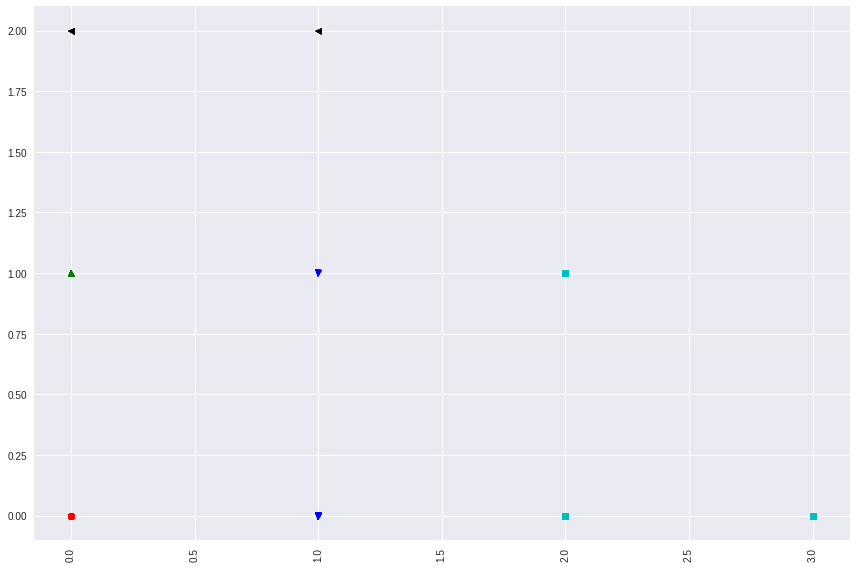

In [77]:
plt.figure(figsize=(12,8))                                                                              

for cluster_num in range(n_clusters):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
    this_cluster = test['cluster']==cluster_num
    plt.plot(test.loc[this_cluster,'pos_scores'], test.loc[this_cluster,'neg_scores'], markers[cluster_num])
    plt.xticks(rotation=90)

plt.tight_layout()

In [78]:
cluster_result = pd.DataFrame(columns=['cluster_id','context'])
for j in range(n_clusters):
    this_cluster = test['cluster']==j
    samples = np.random.choice(test.loc[this_cluster,['text']].values.reshape((-1)), size=3)
    print("Cluster %d: "%j)
    for text in samples:
        print(text[:50])
    print('--------------------')

# from the below results, found that there are a lot of negative feedback measured from Cluster 1 and 3

Cluster 0: 
@TMConnects my streamyx cant connect to the networ
@edman2004 Hi. Can you DM your UniFi/Streamyx acco
@caranthir23 Hi. Are you using UniFi or Streamyx y
--------------------
Cluster 1: 
FREE 30 Minutes/Day 1Mbps Internet Access (UniFi &
RT @maya_karin: UniFi and Streamyx customers? Awes
Dato Sri Mohamed Shazalli Ramly has been appointed
--------------------
Cluster 2: 
@TMConnects hi my office telephone, fax &amp; stre
Called Streamyx just now. All problem solved. Yass
@VigilantAbused hi..streamyx can upgrade to unifi 
--------------------
Cluster 3: 
@TMConnects I have a problem w the Streamyx I can 
Probably I have wasted 20% of my life time by thro
Streamyx has been shitty lately. Fuck you man, fuc
--------------------
Cluster 4: 
I love Umobile and Streamyx internet connection 🙃 
Are you watching #iflix using your UniFi or Stream
5mbps is good enough in @BeaufortTown rather than 
--------------------


In [79]:
# save the file into csv for processing to QlickSense 
forsavingCluster = test[['t_id','created_at','text','user_name','location','pos_scores','neg_scores','cluster']]

In [80]:
# save the result
forsavingCluster.to_csv('result_tweet_clustering.csv', sep=',', encoding='utf-8',quotechar='"',line_terminator='\n',header=True)

## 5.2 <a id='nmf'>Using Non Matrix Factorization (NMF) for clustering</a>
<a href="#toc">Home</a>

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000,
                             stop_words='english')

In [82]:
tfidf = vectorizer.fit_transform(test.loc[test['text'].notnull(), 'text'])

In [83]:
n_topics = 10
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

In [84]:
n_top_words = 20
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
group ramly shazalli dato appointed effective sri mohamed adillaazam managing director ceo amp telekom malaysia rt mohammed new names coverage
Topic #1:
just confirm unifi ya subscribing hi want huh streamyx using service package subsribed referring previously upgrade slow cupcakkebutera referred called
Topic #2:
number account dm check holder ic thanks unifi hi streamyx kay dale50373798 telephone amp end lilyamalina adzymm snxwflakemalik checking fyi
Topic #3:
streamyx tmconnects line working phone fuck tm unifi wifi upgrade yes know problem today connect service pay speed internet wrong
Topic #4:
2017 closing date yayasan 31 march local fxlzwajhe1 overseas 11 student_spm https telekom malaysia rt soon scholarships scholarship 22 mohammed
Topic #5:
referring account refer hi streamyx reunitero previously referred salimin_c3 cupcakkebutera ve anasjalen gt confirm connectivity just register fyi upload checking
Topic #6:
using unifi modem router hi tried btw ya restart restarti

## 6.0 <a id='summary'>SUMMARY</a>
<a href="#toc">Home</a>

1. In NLP, we have used 2 corpus reference, there are from UIC and from TextBlob. Both are showing similar results. 
2. Based on ML classification, we know that
   * RF is not a good classification because it needs us to label them manually. 
   * Using Naive Bayes, we were trying to use 12,000 of labelled tweets and make them into as the training set. However, technically, there problems with the classification because when we try the sentence 'unifi is good', still it goes to negative sentiment. 
3. Based on clustering, we know the mostly discussed words. 
   * K-Means are pretty much captured that most of the tweets are hate tweets.
   * NMF also shows similar result for K-Means